<a href="https://colab.research.google.com/github/vvshyer/tensorflow2.0_learning/blob/master/tf_keras_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0-alpha0
sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)
matplotlib 3.0.3
numpy 1.16.3
pandas 0.24.2
sklearn 0.21.1
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


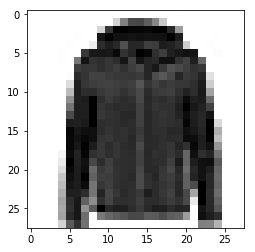

In [5]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()
    
show_single_image(x_train[0])

In [0]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols*1.4, n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary",
                       interpolation = 'nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']


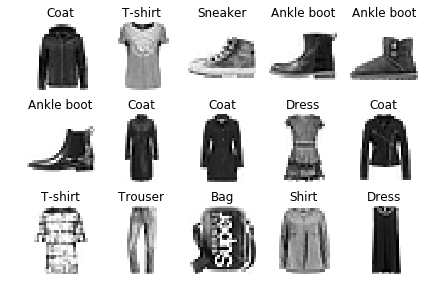

In [7]:
show_imgs(3, 5, x_train, y_train, class_names)

In [0]:
# tf.keras.models.Sequential()
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# relu: y=max(0, x)
# softmax: 将向量变为概率分布. x = [x1, x2, x3]
#          y = [e^x1/sum, e^x2/sum, e^x3/sum]
#          sum = e^x1 + e^x2 + e^x3

# 第二种Sequential使用方式：
# model = keras.model.Sequential([
#     keras.layers.Flatten(input_shape = [28, 28]),
#     keras.layers.Dense(300, activation='relu'),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])


# sparse的原因：因为y->index.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = 'sgd',
              metrics = ['accuracy'])


In [9]:
model.layers

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 第一层: [None, 784] * W + b -> [None, 300]
# W.shape [784, 300], b.shape = [300, 1]

In [12]:
history = model.fit(x_train, y_train, epochs = 10,
          validation_data = (x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 114us/sample - loss: 2.0620 - accuracy: 0.7345 - val_loss: 0.6053 - val_accuracy: 0.8018
Epoch 2/10
55000/55000 [==============================] - 5s 93us/sample - loss: 0.5567 - accuracy: 0.7990 - val_loss: 0.5311 - val_accuracy: 0.8220
Epoch 3/10
55000/55000 [==============================] - 5s 93us/sample - loss: 0.4939 - accuracy: 0.8215 - val_loss: 0.4981 - val_accuracy: 0.8324
Epoch 4/10
55000/55000 [==============================] - 5s 93us/sample - loss: 0.4561 - accuracy: 0.8331 - val_loss: 0.4771 - val_accuracy: 0.8416
Epoch 5/10
55000/55000 [==============================] - 6s 115us/sample - loss: 0.4260 - accuracy: 0.8430 - val_loss: 0.4728 - val_accuracy: 0.8396
Epoch 6/10
55000/55000 [==============================] - 6s 107us/sample - loss: 0.4054 - accuracy: 0.8496 - val_loss: 0.4586 - val_accuracy: 0.8510
Epoch 7/10
55000/55000 [==============================

In [13]:
type(history)

tensorflow.python.keras.callbacks.History

In [14]:
history.history

{'accuracy': [0.73447275,
  0.799,
  0.8214545,
  0.83314544,
  0.8429818,
  0.8496,
  0.85603637,
  0.8623818,
  0.86483634,
  0.8684],
 'loss': [2.062013185561787,
  0.5567055275223471,
  0.4938889234282754,
  0.4560928507761522,
  0.42596423987475307,
  0.40540996001850477,
  0.38881416422453796,
  0.3748693872906945,
  0.36312224663387643,
  0.35331400035077876],
 'val_accuracy': [0.8018,
  0.822,
  0.8324,
  0.8416,
  0.8396,
  0.851,
  0.8522,
  0.853,
  0.8474,
  0.8574],
 'val_loss': [0.6053233849525451,
  0.5311240508079529,
  0.49814177188873293,
  0.4771014800071716,
  0.472820001745224,
  0.45861260561943057,
  0.4453620403766632,
  0.43645666875839234,
  0.4519670714616775,
  0.42980154151916505]}

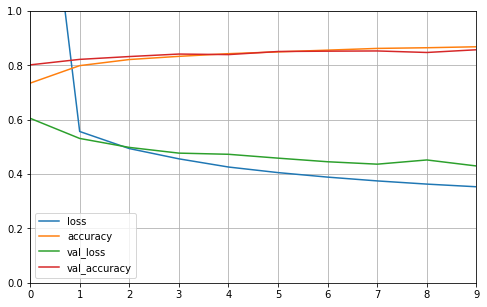

In [15]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [16]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 50us/sample - loss: 0.4591 - accuracy: 0.8440


[0.45911563657522203, 0.844]